In [2]:
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
from matplotlib import cm
import xarray as xr
import pandas as pd
import datetime
import warnings # Silence the warnings from SHARPpy
warnings.filterwarnings("ignore")
from scipy import interpolate
from scipy.ndimage import gaussian_filter
import scipy
import scipy.stats
import math
import cmweather
import matplotlib.patches as mpatches
import glob
import os
from metpy.units import units
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 20
from matplotlib.ticker import FormatStrFormatter
import pingouin as pg
import shapely
import shapely.plotting
import shapely.wkt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import statsmodels.api as sm
from scipy.stats import spearmanr, pearsonr

In [3]:
d = {}
d_full = {}
d_full2 = {}


path = '/data/keeling/a/melinda3/gpm/data_dir/'

"""li = 4
ui = 29
hash = 'final_tracking_algo_hodo_test_'+str(li)+'_'+str(ui)+'_1m_dss_full_.csv'
file_in = pd.read_csv(path+hash)
file_in = file_in.replace(-9999, np.nan)
d_full["area{0}_{1}_dss".format(li, ui)] = file_in

hash = 'final_tracking_algo_hodo_test_'+str(li)+'_'+str(ui)+'_1m_hss_full.csv'
file_in = pd.read_csv(path+hash)
file_in = file_in.replace(-9999, np.nan)
d_full["area{0}_{1}_hss".format(li, ui)] = file_in

hash = 'final_tracking_algo_hodo_test_'+str(li)+'_'+str(ui)+'_1m_lss_full.csv'
file_in = pd.read_csv(path+hash)
file_in = file_in.replace(-9999, np.nan)
d_full["area{0}_{1}_lss".format(li, ui)] = file_in"""

li = 6
ui = 29
hash = 'final_tracking_algo_hodo_test_'+str(li)+'_'+str(ui)+'_1m_lss_full.csv'
file_in = pd.read_csv(path+hash)
file_in = file_in.replace(-9999, np.nan)
d_full["area{0}_{1}_lss".format(li, ui)] = file_in

hash = 'final_tracking_algo_hodo_test_'+str(li)+'_'+str(ui)+'_1m_dss_full.csv'
file_in = pd.read_csv(path+hash)
file_in = file_in.replace(-9999, np.nan)
d_full["area{0}_{1}_dss".format(li, ui)] = file_in

hash = 'final_tracking_algo_hodo_test_'+str(li)+'_'+str(ui)+'_1m_hss15_full.csv'
file_in = pd.read_csv(path+hash)
file_in = file_in.replace(-9999, np.nan)
d_full["area{0}_{1}_h15".format(li, ui)] = file_in

hash = 'final_tracking_algo_hodo_test_'+str(li)+'_'+str(ui)+'_1m_lss15_full.csv'
file_in = pd.read_csv(path+hash)
file_in = file_in.replace(-9999, np.nan)
d_full["area{0}_{1}_l15".format(li, ui)] = file_in

hash = 'final_tracking_algo_hodo_test_'+str(li)+'_'+str(ui)+'_1m_hss_full.csv'
file_in = pd.read_csv(path+hash)
file_in = file_in.replace(-9999, np.nan)
d_full["area{0}_{1}_hss".format(li, ui)] = file_in

li = 8
hash = 'final_tracking_algo_hodo_test_'+str(li)+'_'+str(ui)+'_1m_lss_full.csv'
file_in = pd.read_csv(path+hash)
file_in = file_in.replace(-9999, np.nan)
d_full["area{0}_{1}_lss".format(li, ui)] = file_in

hash = 'final_tracking_algo_hodo_test_'+str(li)+'_'+str(ui)+'_1m_dss_full.csv'
file_in = pd.read_csv(path+hash)
file_in = file_in.replace(-9999, np.nan)
d_full["area{0}_{1}_dss".format(li, ui)] = file_in

hash = 'final_tracking_algo_hodo_test_'+str(li)+'_'+str(ui)+'_1m_hss_full.csv'
file_in = pd.read_csv(path+hash)
file_in = file_in.replace(-9999, np.nan)
d_full["area{0}_{1}_hss".format(li, ui)] = file_in

hash = 'final_tracking_algo_hodo_test_'+str(li)+'_'+str(ui)+'_1m_lss15_full.csv'
file_in = pd.read_csv(path+hash)
file_in = file_in.replace(-9999, np.nan)
d_full["area{0}_{1}_l15".format(li, ui)] = file_in


li = 10
hash = 'final_tracking_algo_hodo_test_'+str(li)+'_'+str(ui)+'_1m_hss15_full.csv'
file_in = pd.read_csv(path+hash)
file_in = file_in.replace(-9999, np.nan)
d_full["area{0}_{1}_h15".format(li, ui)] = file_in
hash = 'final_tracking_algo_hodo_test_'+str(li)+'_'+str(ui)+'_1m_lss_full.csv'
file_in = pd.read_csv(path+hash)
file_in = file_in.replace(-9999, np.nan)
d_full["area{0}_{1}_lss".format(li, ui)] = file_in
hash = 'final_tracking_algo_hodo_test_'+str(li)+'_'+str(ui)+'_1m_dss_full.csv'
file_in = pd.read_csv(path+hash)
file_in = file_in.replace(-9999, np.nan)
d_full["area{0}_{1}_dss".format(li, ui)] = file_in
hash = 'final_tracking_algo_hodo_test_'+str(li)+'_'+str(ui)+'_1m_lss15_full.csv'
file_in = pd.read_csv(path+hash)
file_in = file_in.replace(-9999, np.nan)
d_full["area{0}_{1}_l15".format(li, ui)] = file_in


lower_shear = [6, 8, 10]
upper_shear = [31, 33, 35]

for li in lower_shear:
    for ui in upper_shear:
        hash = 'final_tracking_algo_hodo_test_'+str(li)+'_'+str(ui)+'_1m_dss_full.csv'
        file_in = pd.read_csv(path+hash)
        file_in = file_in.replace(-9999, np.nan)
        d_full["area{0}_{1}_dss".format(li, ui)] = file_in
        
        hash = 'final_tracking_algo_hodo_test_'+str(li)+'_'+str(ui)+'_1m_lss_full.csv'
        file_in = pd.read_csv(path+hash)
        file_in = file_in.replace(-9999, np.nan)
        d_full["area{0}_{1}_lss".format(li, ui)] = file_in

        hash = 'final_tracking_algo_hodo_test_'+str(li)+'_'+str(ui)+'_1m_hss_full.csv'
        file_in = pd.read_csv(path+hash)
        file_in = file_in.replace(-9999, np.nan)
        d_full["area{0}_{1}_hss".format(li, ui)] = file_in

        hash = 'final_tracking_algo_hodo_test_'+str(li)+'_'+str(ui)+'_1m_lss15_full.csv'
        file_in = pd.read_csv(path+hash)
        file_in = file_in.replace(-9999, np.nan)
        d_full["area{0}_{1}_l15".format(li, ui)] = file_in

        hash = 'final_tracking_algo_hodo_test_'+str(li)+'_'+str(ui)+'_1m_hss15_full.csv'
        file_in = pd.read_csv(path+hash)
        file_in = file_in.replace(-9999, np.nan)
        d_full["area{0}_{1}_h15".format(li, ui)] = file_in


d = d_full

In [4]:
uca_con = np.zeros(len(d))
ota_con = np.zeros(len(d))
bshear_con = np.zeros(len(d))
hodol_con = np.zeros(len(d))
hodor_con = np.zeros(len(d))
cv_con = np.zeros(len(d))
n2_con = np.zeros(len(d))
srh_con = np.zeros(len(d))
otd_con = np.zeros(len(d))
upper_area_con = np.zeros(len(d))
upper_velo_con = np.zeros(len(d))
lower_area_con = np.zeros(len(d))
lower_velo_con = np.zeros(len(d))
el_velo_con = np.zeros(len(d))


n = 0
for key in d:
    print(key)
    data = d[key]
    data = data[data.time > data.time_split.iloc[0]]
    uca_bshear = data['bshear06'].iloc[0]
    n2 = data['n2'].iloc[0]
    srh = data['srh03'].iloc[0]

    core_data = data[(data.z >= 4) & (data.z < 8)]
    ot_data = data[(data.z > 13.3) & (data.z < 13.4)]
    lower_data = data[(data.z >= 2.5) & (data.z < 4)] 
    upper_data = data[(data.z >= 8) & (data.z < 12.5)]
    otd_data = data[(data.z > 13.375)]
    otd_grouped = otd_data.groupby("time", dropna = True)
    grouped_core_data = core_data.groupby("time", dropna = True)
    grouped_upper_data = upper_data.groupby('time', dropna =True)
    grouped_lower_data = lower_data.groupby('time', dropna = True)
    grouped_ot_data = ot_data.groupby("time", dropna=True)

    uca_area = grouped_core_data.mean('polygon_med_area').max()['polygon_med_area']
    core_velo = grouped_core_data.mean('max_velo').max()['max_velo']
    ota_area = grouped_ot_data.mean('polygon_med_area').max()['polygon_med_area']
    lower_area = grouped_lower_data.mean('polygon_med_area').max()['polygon_med_area']
    upper_area = grouped_upper_data.mean('polygon_med_area').max()['polygon_med_area']
    upper_velo = grouped_upper_data.mean('max_velo').max()['max_velo'] 
    lower_velo = grouped_lower_data.mean('max_velo').max()['max_velo']
    otd = otd_grouped.max('z').max()['z']
    otd = otd - 13.375
    el_velo = grouped_ot_data.mean('max_velo').max()['max_velo']

    if "6" in key:
        hodo_rad_key = np.int64(key[4])
        hodo_len_key = np.int64(key[6:8])
    elif "8" in key:
        hodo_rad_key = np.int64(key[4])
        hodo_len_key = np.int64(key[6:8])
    elif "4" in key:
        hodo_rad_key = np.int64(key[4])
        hodo_len_key = np.int64(key[6:8])
    else:
        hodo_rad_key = np.int64(key[4:6])
        hodo_len_key = np.int64(key[7:9])

    uca_con[n] = uca_area * .5 * .5
    ota_con[n] = ota_area * .5 * .5
    bshear_con[n] = uca_bshear
    cv_con[n] = core_velo
    hodor_con[n] = hodo_rad_key
    hodol_con[n] = hodo_len_key
    n2_con[n] = n2
    srh_con[n] = srh
    upper_area_con[n] = upper_area * .5 * .5
    lower_area_con[n] = lower_area * .5 * .5
    el_velo_con[n] = el_velo
    otd_con[n] = otd
    lower_velo_con[n] = lower_velo
    upper_velo_con[n] = upper_velo

    n+=1

dict = {'uca':uca_con, 'ota':ota_con, 'bshear':bshear_con,\
        'core_velo':cv_con, 'hodo_r':hodor_con, 'hodo_l':hodol_con,\
        'lca':lower_area_con, 'upca':upper_area_con, 'n2':n2_con,\
        'srh':srh_con, 'lvel':lower_area_con, 'upvel':upper_velo_con,\
        'el_vel':el_velo_con, 'otd':otd_con}

data_dict = pd.DataFrame(dict)

area6_29_lss
area6_29_dss
area6_29_h15
area6_29_l15
area6_29_hss
area8_29_lss
area8_29_dss
area8_29_hss
area8_29_l15
area10_29_h15
area10_29_lss
area10_29_dss
area10_29_l15
area6_31_dss
area6_31_lss
area6_31_hss
area6_31_l15
area6_31_h15
area6_33_dss
area6_33_lss
area6_33_hss
area6_33_l15
area6_33_h15
area6_35_dss
area6_35_lss
area6_35_hss
area6_35_l15
area6_35_h15
area8_31_dss
area8_31_lss
area8_31_hss
area8_31_l15
area8_31_h15
area8_33_dss
area8_33_lss
area8_33_hss
area8_33_l15
area8_33_h15
area8_35_dss
area8_35_lss
area8_35_hss
area8_35_l15
area8_35_h15
area10_31_dss
area10_31_lss
area10_31_hss
area10_31_l15
area10_31_h15
area10_33_dss
area10_33_lss
area10_33_hss
area10_33_l15
area10_33_h15
area10_35_dss
area10_35_lss
area10_35_hss
area10_35_l15
area10_35_h15


In [5]:
ota_pred_cols = ['uca', 'hodo_r', 'hodo_l', 'n2']
X_ota = data_dict[ota_pred_cols]
Y_ota = data_dict['upca']
ota_vars = data_dict[['ota', 'upca', 'uca', 'lca', 'hodo_r', 'hodo_l', 'n2']]

otd_pred_cols = ['core_velo', 'hodo_r', 'hodo_l', 'n2']
X_otd = data_dict[otd_pred_cols]
Y_otd = data_dict['otd']
otd_vars = data_dict[['otd', 'upvel', 'core_velo', 'lvel', 'hodo_r', 'hodo_l', 'n2']]

uluca_vars = data_dict[['upca', 'uca', 'lca', 'hodo_r', 'hodo_l', 'n2']]
ulcv_vars = data_dict[['upvel', 'core_velo', 'lvel', 'hodo_r', 'hodo_l', 'n2']]

In [6]:
#Get Spearman rank correlations to understand if the data are monotonic or not

ota_corrs, ota_pvals = spearmanr(ota_vars)
otd_corrs, otd_pvals = spearmanr(otd_vars)

uluca_corrs, uluca_pvals = spearmanr(uluca_vars)
ulcv_corrs, ulcv_pvals = spearmanr(ulcv_vars)

In [7]:
#Only apply bold to the correlations that are statistically signficant
#Modeled off of https://www.geeksforgeeks.org/step-by-step-guide-to-annotating-diagonal-elements-in-seaborn-heatmaps/

def annotate_diagonal(data, mask, ax, corr_data, diag_mask):
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if diag_mask[i,j] == False:
                if mask[i, j]:
                    if corr_data[i, j] < -0.5:
                        ax.text(j + 0.5, i + 0.5, f'{corr_data[i, j]:.1f}', 
                                ha='center', va='center', fontweight = 'bold', color = 'white')
                    elif corr_data[i,j] >= 0.7:
                        ax.text(j + 0.5, i + 0.5, f'{corr_data[i, j]:.1f}', 
                                ha='center', va='center', fontweight = 'bold', color = 'white')
                    else:
                        ax.text(j + 0.5, i + 0.5, f'{corr_data[i, j]:.1f}', 
                                ha='center', va='center', fontweight = 'bold')
                else:
                    ax.text(j + 0.5, i + 0.5, f'{corr_data[i, j]:.1f}', 
                                ha='center', va='center')
            else:
                continue

In [8]:
otamask = np.zeros_like(ota_corrs, dtype=bool)
otamask[np.triu_indices_from(otamask)] = True

otdmask = np.zeros_like(otd_corrs, dtype=bool)
otdmask[np.triu_indices_from(otdmask)] = True

In [9]:
ota_mask = ota_pvals < 0.05
otd_mask = otd_pvals < 0.05

ota_labels = ['OTA', 'ULUCA', 'MLUCA', 'LLUCA', '0-2HR', '2-6HL', r"$\rm{N}^{2}$"]
otd_labels = ['OTD', 'ULUC W', 'MLUC W', 'LLUC W', '0-2HR', '2-6HL', r"$\rm{N}^{2}$"]

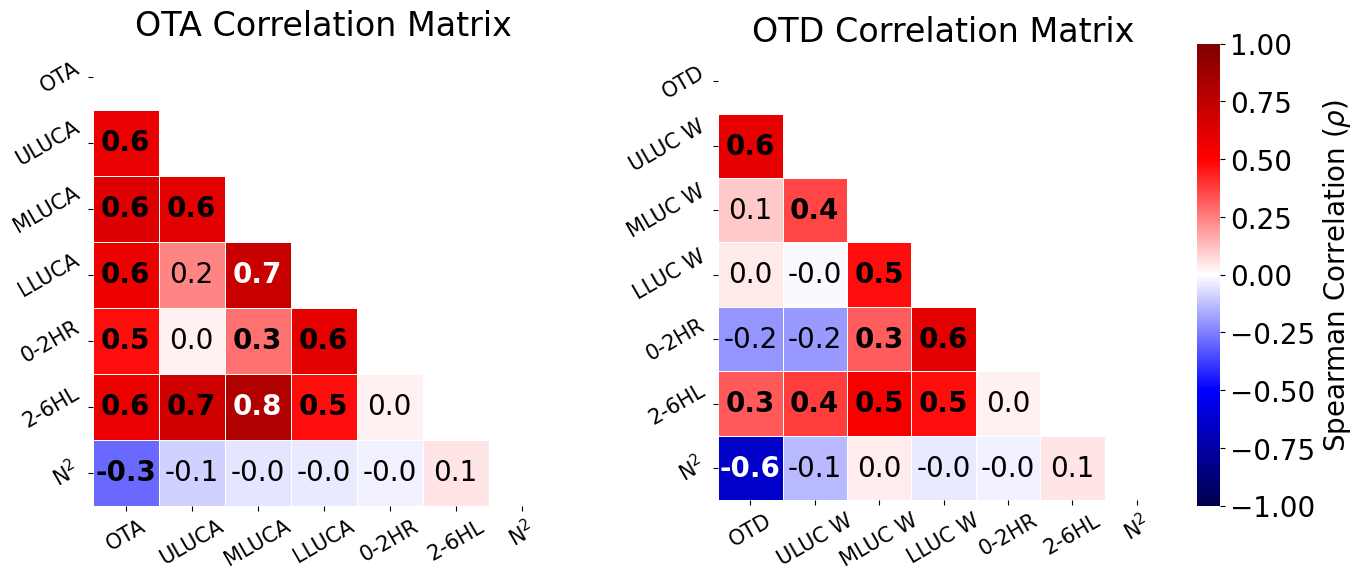

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))
cbar_label = 'Spearman Correlation ($\\rho$)'
p1 = sns.heatmap(ota_corrs, annot = False, linewidth= 0.5, \
                vmin = -1, vmax = 1 ,ax = ax1, cmap = 'seismic', cbar=False, square=True, mask = otamask)
ax1.set_title('OTA Correlation Matrix')
ax1.set_xticklabels(ota_labels, fontsize = 15, rotation = 30)
ax1.set_yticklabels(ota_labels, fontsize = 15, rotation = 30)
annotate_diagonal(ota_pvals, ota_mask, ax1, ota_corrs, otamask)

p2 = sns.heatmap(otd_corrs, annot = False, linewidth= 0.5,\
                vmin = -1, vmax = 1, fmt=".01f",ax = ax2, cmap = 'seismic', cbar = True, square =True, mask = otdmask,\
                    cbar_kws={'label':cbar_label})
ax2.set_title('OTD Correlation Matrix')
ax2.set_xticklabels(otd_labels, fontsize = 15, rotation = 30)
ax2.set_yticklabels(otd_labels, fontsize = 15, rotation = 30)
annotate_diagonal(otd_pvals, otd_mask, ax2, otd_corrs, otdmask)


In [11]:
#Create cross-sections that show the differences in N2 and shear
lss_dsh = xr.open_dataset('/data/keeling/a/melinda3/NASA/cm1_radiation/temp_cm1_dir/hodo_test_8_33_1m_lss_full/cm1out_000086.nc')
dss_dsh86 = xr.open_dataset('/data/keeling/a/melinda3/NASA/cm1_radiation/temp_cm1_dir/hodo_test_8_33_1m_dss_full/cm1out_000086.nc')
hss_dsh = xr.open_dataset('/data/keeling/a/melinda3/NASA/cm1_radiation/temp_cm1_dir/hodo_test_8_33_1m_hss_full/cm1out_000086.nc')

dss_lsh = xr.open_dataset('/data/keeling/a/melinda3/NASA/cm1_radiation/temp_cm1_dir/hodo_test_6_29_1m_dss_full/cm1out_000090.nc')
dss_hsh = xr.open_dataset('/data/keeling/a/melinda3/NASA/cm1_radiation/temp_cm1_dir/hodo_test_10_35_1m_dss_full/cm1out_000090.nc')
dss_dsh90 = xr.open_dataset('/data/keeling/a/melinda3/NASA/cm1_radiation/temp_cm1_dir/hodo_test_8_33_1m_dss_full/cm1out_000090.nc')

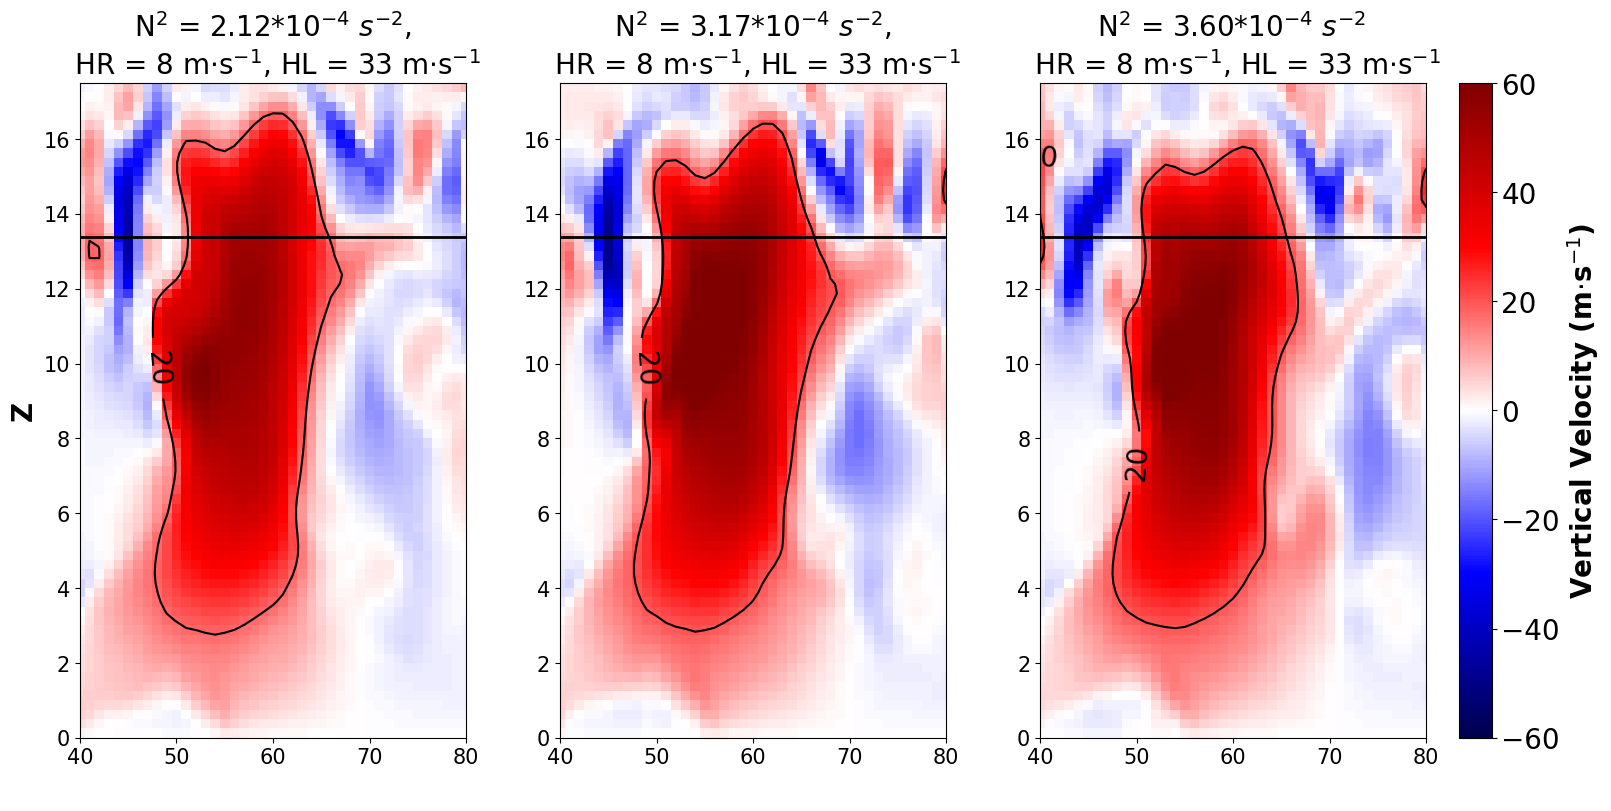

In [12]:
#Add a planar view of the OT
fig,(ax1, ax2, ax3) = plt.subplots(nrows=1,ncols=3, figsize=(16, 8), constrained_layout = True)

start = (-50, 35)
end = (0, 68)
dist = ((end[1]-end[0])**2. + (start[1]-start[0])**2.)**0.5
new_x = xr.DataArray(np.linspace(start[0], end[0], int(dist)), dims='polygon_med_area')
new_y = xr.DataArray(np.linspace(start[1], end[1], int(dist)), dims='polygon_med_area')

th_interp_ds = lss_dsh['winterp'].isel(time=0).interp(xh=new_x, yh=new_y)
w_interp_ds = lss_dsh['winterp'].isel(time=0).interp(xh=new_x, yh=new_y)
qi_interp_ds = lss_dsh['qi'].isel(time=0).interp(xh=new_x, yh=new_y)*1000


w_interp_ds.sel(zh = slice(0,22)).plot.pcolormesh(cmap = 'seismic', ax=ax1, add_colorbar=False)
cntr = th_interp_ds.sel(zh=slice(0,22)).plot.contour(levels = [20], ax=ax1, colors = 'k')
#qi_cntr = qi_interp_ds.sel(zh = slice(0,22)).plot.contour(colors='grey', levels = [0.01], ax=ax3, linewidth=3)
ax1.clabel(cntr, cntr.levels, inline = True, fontsize = 20)
ax1.hlines(13.375, 0, 100, 'k', lw =2)
ax1.set_ylim([0,17.5])
ax1.tick_params(axis='both', which = 'major', labelsize = 15)
ax1.set_xlabel(" ")
ax1.set_ylabel("Z", fontsize = 20, weight = 'bold')
ax1.set_xlim(40, 80)
ax1.set_title(r"$\rm{N}^{2}$"+ " = 2.12*$10^{-4}$ $s^{-2}$,\n HR = 8 m$\cdot$s$^{-1}$, HL = 33 m$\cdot$s$^{-1}$", fontsize = 20)

start = (-50, 35)
end = (0, 68)
dist = ((end[1]-end[0])**2. + (start[1]-start[0])**2.)**0.5
new_x = xr.DataArray(np.linspace(start[0], end[0], int(dist)), dims='polygon_med_area')
new_y = xr.DataArray(np.linspace(start[1], end[1], int(dist)), dims='polygon_med_area')

th_interp_ds = dss_dsh86['winterp'].isel(time=0).interp(xh=new_x, yh=new_y)
w_interp_ds = dss_dsh86['winterp'].isel(time=0).interp(xh=new_x, yh=new_y)
qi_interp_ds = dss_dsh86['qi'].isel(time=0).interp(xh=new_x, yh=new_y)*1000
w_interp_ds.sel(zh = slice(0,22)).plot.pcolormesh(cmap = 'seismic', ax=ax2, add_colorbar=False, vmin = -60, vmax = 60)
cntr = th_interp_ds.sel(zh=slice(0,22)).plot.contour(levels = [20], ax=ax2, colors = 'k')
ax2.clabel(cntr, cntr.levels, inline = True, fontsize = 20)
ax2.set_ylim([0,17.5])
ax2.hlines(13.375, 0, 100, 'k', lw =2)
ax2.tick_params(axis='both', which = 'major', labelsize = 15)
ax2.set_xlabel(" ")
ax2.set_ylabel(" ")
ax2.set_xlim(40, 80)
ax2.set_title(r"$\rm{N}^{2}$"+ " = 3.17*$10^{-4}$ $s^{-2}$,\n HR = 8 m$\cdot$s$^{-1}$, HL = 33 m$\cdot$s$^{-1}$", fontsize = 20)

start = (-50, 35)
end = (0, 68)
dist = ((end[1]-end[0])**2. + (start[1]-start[0])**2.)**0.5
new_x = xr.DataArray(np.linspace(start[0], end[0], int(dist)), dims='polygon_med_area')
new_y = xr.DataArray(np.linspace(start[1], end[1], int(dist)), dims='polygon_med_area')

th_interp_ds = hss_dsh['winterp'].isel(time=0).interp(xh=new_x, yh=new_y)
w_interp_ds = hss_dsh['winterp'].isel(time=0).interp(xh=new_x, yh=new_y)
dss1 = w_interp_ds.sel(zh = slice(0,22)).plot.pcolormesh(cmap = 'seismic', ax=ax3, add_colorbar=False, vmin = -60, vmax = 60)
cntr = th_interp_ds.sel(zh=slice(0,22)).plot.contour(levels = [20], ax=ax3, colors = 'k')
ax3.hlines(13.375, 0, 100, 'k', lw =2)
ax3.clabel(cntr, cntr.levels, inline = True, fontsize = 20)
ax3.set_ylim([0,17.5])
ax3.tick_params(axis='both', which = 'major', labelsize = 15)
ax3.set_xlabel(" ")
ax3.set_ylabel(" ")
ax3.set_xlim(40, 80)
ax3.set_title(r"$\rm{N}^{2}$"+ " = 3.60*$10^{-4}$ $s^{-2}$ \n HR = 8 m$\cdot$s$^{-1}$, HL = 33 m$\cdot$s$^{-1}$", fontsize = 20)


cbar = fig.colorbar(dss1, ax=(ax3), orientation = 'vertical')
cbar.ax.tick_params(labelsize = 20)
cbar.set_label('Vertical Velocity (m$\cdot$s$^{-1}$)', size = 20, weight = 'bold')

In [ ]:
#Add a planar view of the OT
fig,(ax1, ax2, ax3) = plt.subplots(nrows=1,ncols=3, figsize=(16, 8), constrained_layout = True)

start = (-50, 34)
end = (0, 66)
dist = ((end[1]-end[0])**2. + (start[1]-start[0])**2.)**0.5
new_x = xr.DataArray(np.linspace(start[0], end[0], int(dist)), dims='polygon_med_area')
new_y = xr.DataArray(np.linspace(start[1], end[1], int(dist)), dims='polygon_med_area')

th_interp_ds = dss_lsh['winterp'].isel(time=0).interp(xh=new_x, yh=new_y)
w_interp_ds = dss_lsh['winterp'].isel(time=0).interp(xh=new_x, yh=new_y)
qi_interp_ds = dss_lsh['qi'].isel(time=0).interp(xh=new_x, yh=new_y)*1000


dss1 = w_interp_ds.sel(zh = slice(0,22)).plot.pcolormesh(cmap = 'seismic', ax=ax1, add_colorbar=False)
cntr = th_interp_ds.sel(zh=slice(0,22)).plot.contour(levels = [20], ax=ax1, colors = 'k')
#qi_cntr = qi_interp_ds.sel(zh = slice(0,22)).plot.contour(colors='grey', levels = [0.01], ax=ax3, linewidth=3)
ax1.clabel(cntr, cntr.levels, inline = True, fontsize = 20)
#ax1.clabel(qi_cntr, qi_cntr.levels, inline = True, fontsize = 20)
ax1.hlines(13.375, 0, 100, 'k', lw =2)
ax1.set_ylim([0,17.2])
ax1.tick_params(axis='both', which = 'major', labelsize = 15)
ax1.set_xlabel(" ")
ax1.set_ylabel("Z", fontsize = 20, weight = 'bold')
ax1.set_xlim(20, 60)
ax1.set_title(r"$\rm{N}^{2}$"+ " = 3.17*$10^{-4}$ $s^{-2}$,\n HR = 6 m$\cdot$s$^{-1}$, HL = 29 m$\cdot$s$^{-1}$", fontsize = 20)

start = (-50, 38)
end = (-5, 63)
dist = ((end[1]-end[0])**2. + (start[1]-start[0])**2.)**0.5
new_x = xr.DataArray(np.linspace(start[0], end[0], int(dist)), dims='polygon_med_area')
new_y = xr.DataArray(np.linspace(start[1], end[1], int(dist)), dims='polygon_med_area')

th_interp_ds = dss_dsh90['winterp'].isel(time=0).interp(xh=new_x, yh=new_y)
w_interp_ds = dss_dsh90['winterp'].isel(time=0).interp(xh=new_x, yh=new_y)
qi_interp_ds = dss_dsh90['qi'].isel(time=0).interp(xh=new_x, yh=new_y)*1000
w_interp_ds.sel(zh = slice(0,22)).plot.pcolormesh(cmap = 'seismic', ax=ax2, add_colorbar=False, vmin = -60, vmax = 60)
cntr = th_interp_ds.sel(zh=slice(0,22)).plot.contour(levels = [20], ax=ax2, colors = 'k')
ax2.clabel(cntr, cntr.levels, inline = True, fontsize = 20)
#ax2.clabel(qi_cntr, qi_cntr.levels, inline = True, fontsize = 20)
ax2.set_ylim([0,17.2])
ax2.hlines(13.375, 0, 100, 'k', lw =2)
ax2.tick_params(axis='both', which = 'major', labelsize = 15)
ax2.set_xlabel(" ")
ax2.set_ylabel(" ")
ax2.set_xlim(50, 90)
ax2.set_title(r"$\rm{N}^{2}$"+ " = 3.17*$10^{-4}$ $s^{-2}$,\n HR = 8 m$\cdot$s$^{-1}$, HL = 33 m$\cdot$s$^{-1}$", fontsize = 20)

start = (-50, 40)
end = (-2, 74)
dist = ((end[1]-end[0])**2. + (start[1]-start[0])**2.)**0.5
new_x = xr.DataArray(np.linspace(start[0], end[0], int(dist)), dims='polygon_med_area')
new_y = xr.DataArray(np.linspace(start[1], end[1], int(dist)), dims='polygon_med_area')

th_interp_ds = dss_hsh['winterp'].isel(time=0).interp(xh=new_x, yh=new_y)
w_interp_ds = dss_hsh['winterp'].isel(time=0).interp(xh=new_x, yh=new_y)
w_interp_ds.sel(zh = slice(0,22)).plot.pcolormesh(cmap = 'seismic', ax=ax3, add_colorbar=False, vmin = -60, vmax = 60)
cntr = th_interp_ds.sel(zh=slice(0,22)).plot.contour(levels = [20], ax=ax3, colors = 'k')
ax3.hlines(13.375, 0, 100, 'k', lw =2)
ax3.clabel(cntr, cntr.levels, inline = True, fontsize = 20)
#ax3.clabel(qi_cntr, qi_cntr.levels, inline = True, fontsize = 20)
ax3.set_ylim([0,17.2])
ax3.tick_params(axis='both', which = 'major', labelsize = 15)
ax3.set_xlabel(" ")
ax3.set_ylabel(" ")
ax3.set_xlim(60, 100)
ax3.set_title(r"$\rm{N}^{2}$"+ " = 3.17*$10^{-4}$ $s^{-2}$,\n HR = 10 m$\cdot$s$^{-1}$, HL = 35 m$\cdot$s$^{-1}$", fontsize = 20)


cbar = fig.colorbar(dss1, ax=(ax3), orientation = 'vertical')
cbar.ax.tick_params(labelsize = 20)
cbar.set_label('Vertical Velocity (m$\cdot$s$^{-1}$)', size = 20, weight = 'bold')